1. Library yang digunakan

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

2. Load Dataset

In [50]:
diabetes_dataset = pd.read_csv('Diabetes.csv')

In [51]:
diabetes_dataset.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [52]:
diabetes_dataset.shape

(2768, 10)

In [53]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [54]:
# Statistik Deskriptif
print(diabetes_dataset.describe())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

In [55]:
# Cek Missing Values
print(diabetes_dataset.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


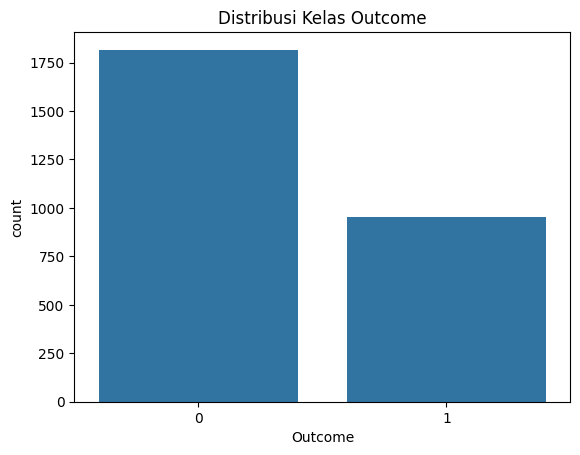

In [56]:
# Visualisasi Distribusi Outcome
sns.countplot(x=diabetes_dataset['Outcome'])
plt.title("Distribusi Kelas Outcome")
plt.show()

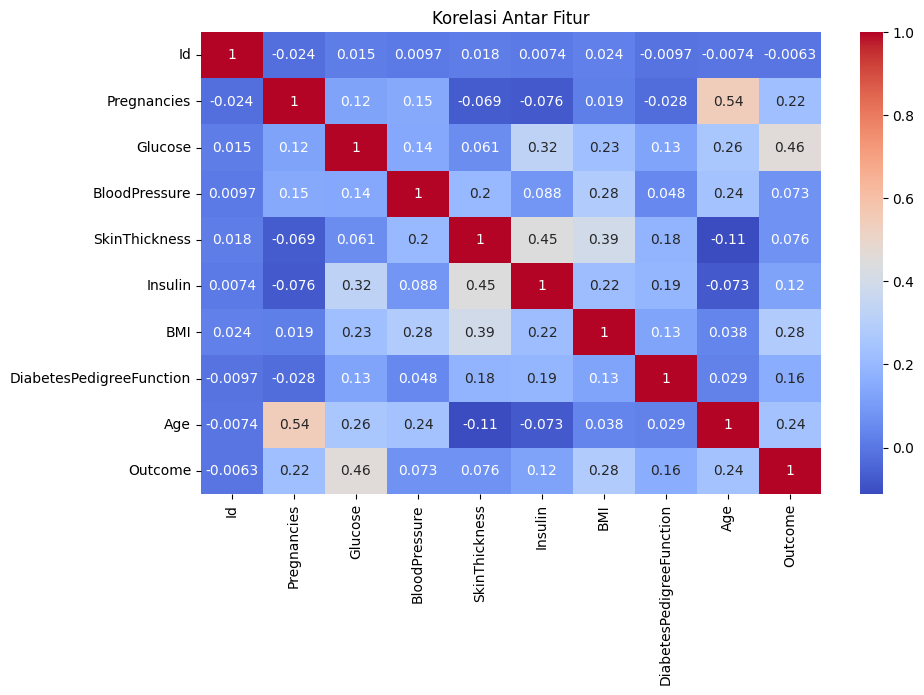

In [57]:
# Korelasi Antar Fitur
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

In [58]:
# memisahkan data dan label
x = diabetes_dataset.drop(columns=['Outcome', 'Id'])  # Hapus kolom 'Outcome' & 'Id'
y = diabetes_dataset['Outcome']  # Label target

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [60]:
print(x)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [62]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [63]:
classifier_no_prep = svm.SVC(kernel='linear')
classifier_no_prep.fit(x_train_no_prep, y_train_no_prep)

SVC(kernel='linear')

In [64]:
test_accuracy_no_prep = accuracy_score(classifier_no_prep.predict(x_test_no_prep), y_test_no_prep)
print('Akurasi Tanpa Preprocessing:', test_accuracy_no_prep)

Akurasi Tanpa Preprocessing: 0.7815884476534296


3. Standarisasi Data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = diabetes_dataset.drop(columns=["Id", "Outcome"])
scaler.fit(x_no_prep)


StandardScaler()

In [17]:
input_data = (5, 116, 74, 0, 0, 25.6, 0.201, 30)
input_df = pd.DataFrame([input_data], columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                                               'SkinThickness', 'Insulin', 'BMI', 
                                               'DiabetesPedigreeFunction', 'Age'])  
std_data = scaler.transform(input_df)

In [18]:
input_df = pd.DataFrame([input_data], columns=x_no_prep.columns)
std_data = scaler.transform(input_df)

In [67]:
scaler = StandardScaler()
scaler.fit(x_train)  # Fit scaler dengan data training
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(x_no_prep)

StandardScaler()

In [70]:
standarize_data = scaler.transform(x_no_prep)


In [71]:
print(standarize_data)

[[ 0.67923239  0.83973755  0.1490333  ...  0.18113541  0.47850939
   1.43249494]
 [-0.82534128 -1.12712422 -0.16301222 ... -0.68577327 -0.36913043
  -0.18107914]
 [ 1.28106186  1.93243853 -0.26702739 ... -1.09445879  0.61671153
  -0.09615419]
 ...
 [ 0.67923239 -1.12712422  0.46107882 ... -0.11609042 -0.2739245
   0.75309532]
 [-1.12625601  0.24655701  2.12532159 ...  4.32991267 -0.4674075
  -0.6057039 ]
 [-0.52442655 -1.25200433  0.1490333  ... -0.25231893  0.23281669
  -0.69062885]]


In [72]:
x = standarize_data
y = diabetes_dataset['Outcome']

In [73]:
print(x)
print(y)

[[ 0.67923239  0.83973755  0.1490333  ...  0.18113541  0.47850939
   1.43249494]
 [-0.82534128 -1.12712422 -0.16301222 ... -0.68577327 -0.36913043
  -0.18107914]
 [ 1.28106186  1.93243853 -0.26702739 ... -1.09445879  0.61671153
  -0.09615419]
 ...
 [ 0.67923239 -1.12712422  0.46107882 ... -0.11609042 -0.2739245
   0.75309532]
 [-1.12625601  0.24655701  2.12532159 ...  4.32991267 -0.4674075
  -0.6057039 ]
 [-0.52442655 -1.25200433  0.1490333  ... -0.25231893  0.23281669
  -0.69062885]]
0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [74]:
x_train, x_test, y_train, y_test = train_test_split(standarize_data, y, test_size=0.2, stratify=y, random_state=2)

In [75]:
print(x_no_prep.shape, x_train.shape, x_test.shape)

(2768, 8) (2214, 8) (554, 8)


5. Membuat data latih menggunakan algoritma SVM

In [76]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [77]:
models = {
    "SVM": svm.SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [78]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(x_train_scaled, y_train)  # Latih model dengan data yang sudah distandardisasi
    accuracy = accuracy_score(model.predict(x_test_scaled), y_test)
    print(f"Akurasi {name}: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Akurasi SVM: 0.7870036101083032
Akurasi Random Forest: 0.9963898916967509
Akurasi Logistic Regression: 0.779783393501805


In [79]:
if best_model is not None:
    pickle.dump(best_model, open('best_diabetes_model.sav', 'wb'))
    print(f"Model terbaik ({best_model}) disimpan dengan akurasi {best_accuracy}")
else:
    print("Tidak ada model yang dipilih sebagai terbaik.")

Model terbaik (RandomForestClassifier()) disimpan dengan akurasi 0.9963898916967509


6. Membuat model evaluasi untuk meengukur tingkat akurasi

In [80]:
x_test_prediction = best_model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print(f"Akurasi model terbaik pada data testing: {test_data_accuracy}")

Akurasi model terbaik pada data testing: 0.9963898916967509


In [81]:
print('Akurasi data akurasi adalah =', test_data_accuracy)

Akurasi data akurasi adalah = 0.9963898916967509


In [82]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [83]:
print('akurasi data testing adalah = ' , test_data_accuracy)

akurasi data testing adalah =  0.7851985559566786


7. Membuat model prediksi

In [84]:
input_data = (5,116,74,0,0,25.6,0.201,30)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('pasien tidak terkena diabetes')
else:
    print('pasien terkena diabetes')

[[ 0.37831766 -0.15930335  0.25304847 -1.29693082 -0.71363302 -0.80961736
  -0.82980424 -0.26600409]]
[0]
pasien tidak terkena diabetes


C:\Users\raiha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. Simpan model

In [90]:
filename = 'best_diabetes_model.sav'
pickle.dump(best_model, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))
print(f"Model terbaik ({best_model}) disimpan dengan akurasi {best_accuracy}")

Model terbaik (RandomForestClassifier()) disimpan dengan akurasi 0.9963898916967509
